In [7]:
%load_ext autoreload
%autoreload 2

import dataprocess_utils
import pandas as pd
import pickle as pkl
import gzip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
IDs: list[int] = dataprocess_utils.load_all_IDs()
all_DFs: dict[str: pd.core.frame.DataFrame] = dataprocess_utils.load_all_DFs()

series_dtypes: list[str] = ["adr", "dob", "hd129", "nad", "rl129", "urine"]
features_dtypes: list[str] = ["pds128", "prehrl126", "s129"]

lower: int = int(min([min(all_DFs[dtype]["minadmin"]) for dtype in series_dtypes]))
upper: int = int(max([max(all_DFs[dtype]["minadmin"]) for dtype in series_dtypes]))

time_series: dict[int: dict[str: list[float]]] = dataprocess_utils.load_time_series()

features: dict[int: dict[str: float]] = dataprocess_utils.load_features()

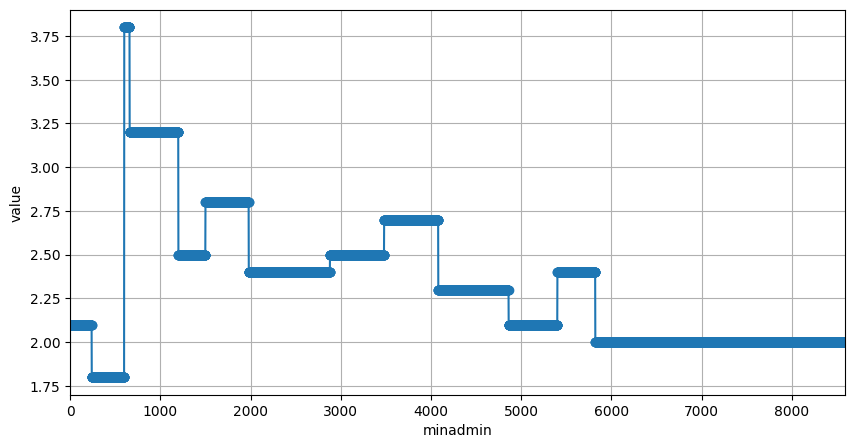

In [3]:
dataprocess_utils.time_series_plot(time_series[8428]["lactates"])

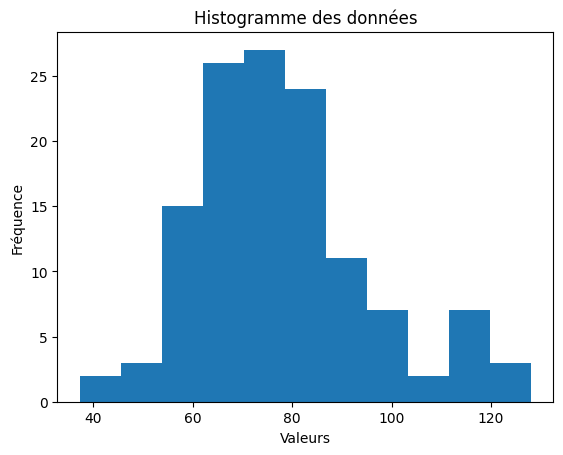

In [4]:
dataprocess_utils.data_plot(sum([[features[pid]["pds"]] for pid in IDs], start=[]))

In [84]:
# 11691 poids de 17.6 alors que 57 ans ?
# changement dans le fichier par nan

In [8]:
with gzip.open("../regression/data.pkl.gz", "wb") as f:
    pkl.dump(
        {"features": features, "time_series": time_series},
        f,
        protocol=pkl.HIGHEST_PROTOCOL
    )